In [157]:
import numpy as np 
import matplotlib.pyplot as plt

In [158]:
def RNG(X, Y, m, N):
    rand_num=[]
    for _ in range(N):
        Xt=(1403580*X[-2] - 810728*X[-3])%m[0]
        X.append(Xt)
        Yt=(527612*Y[-2] - 1370589*Y[-3])%m[1]
        Y.append(Yt)
        if Xt<=Yt:
            Ut=(Xt-Yt + m[0])/(m[0]+1)
            rand_num.append(Ut)
        else:
            Ut=(Xt - Yt)/(m[0] + 1)
            rand_num.append(Ut)
    return rand_num


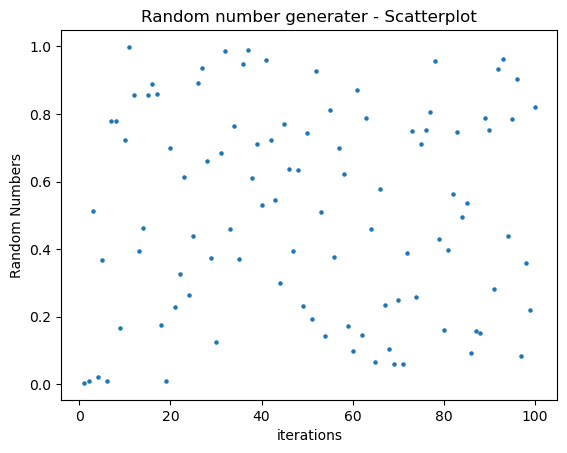

In [159]:
X=[15,8,25]
Y=[20, 15, 5]
m=[4294967087,4294944443] 
N=100
Rand_number=RNG(X, Y, m, N)

#Scatterplot
plt.scatter(range(1,N+1),Rand_number, s=5)
plt.title("Random number generater - Scatterplot")
plt.xlabel("iterations")
plt.ylabel("Random Numbers")
plt.show()

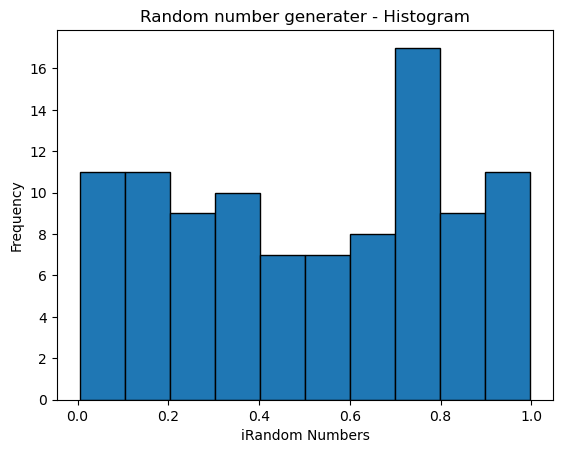

In [160]:
#Histrogram
plt.hist(Rand_number, edgecolor="black")
plt.title("Random number generater - Histogram")
plt.xlabel("iRandom Numbers")
plt.ylabel("Frequency")
plt.show()

9
[0, 0, 3, 1, 3, 0, 4, 4, 2, 4, 7, 5, 3, 3, 5, 5, 5, 2, 0, 4, 2, 3, 4, 2, 3, 5, 5, 4, 3, 2, 4, 6, 3, 4, 3, 5, 6, 4, 4, 3, 6, 4, 3, 2, 4, 4, 3, 4, 2, 4, 2, 5, 3, 2, 4, 3, 4, 4, 2, 1, 5, 2, 4, 3, 1, 3, 2, 1, 1, 2, 1, 3, 4, 2, 4, 4, 4, 6, 3, 2, 3, 3, 4, 3, 3, 1, 2, 2, 4, 4, 2, 5, 6, 3, 4, 5, 1, 3, 2, 4]


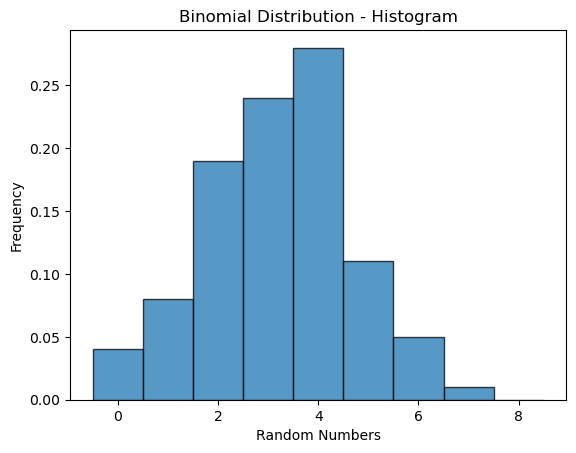

In [161]:
import math

def binomial(Rand_number, n, p):
    P = []

    # Get P values
    for i in range(n + 1):
        k = math.comb(n, i) * (p**i) * ((1 - p)**(n - i))
        P.append(k)
    print(len(P))
    # Using cumilative distribution get 
    for i in range(len(Rand_number)):
        for j in range(len(P)+1):
            if Rand_number[i] <= sum(P[:j+1]):
                Rand_number[i] = j
                break

    return Rand_number

n = 8
probability = 0.4
result_binomial = binomial(Rand_number, n, probability)
print(result_binomial)
plt.hist(result_binomial ,bins=np.arange(0, n+2)-0.5, density=True, alpha=0.75,edgecolor="black")
plt.title("Binomial Distribution - Histogram")
plt.xlabel("Random Numbers")
plt.ylabel("Frequency")
plt.show()

In [162]:
from scipy.optimize import linprog

# Coefficients of the objective function
c = [550, 460, 530]

# Coefficients of the inequality constraints matrix (left-hand side)
A = [
    [0.4, 0.4, 0.4],
    [0.4, 0.4, 0.2],
    [0.2, 0.0, 0.2],
    [0.0, 0.4, 0.2],
    [-1, 0, 0],
    [0, -1, 0],
    [0, 0, -1]
]

# Right-hand side of the inequality constraints
b = [6.8, 4.76, 2.55, 2.89, -10, -5, -10]

# Bounds for variables
x1_bounds = (None, 10)
x2_bounds = (None, 5)
x3_bounds = (None, 10)

# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=[x1_bounds, x2_bounds, x3_bounds], method='highs')

# Display the results
print("Optimal values of x:", result.x)
print("Optimal value of the objective function (Z):", result.fun)


Optimal values of x: None
Optimal value of the objective function (Z): None
